In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from keras.utils import set_random_seed
seed = 13
set_random_seed(
    seed
)


# Load Data, Preprocessing and reshape

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Preprocess the data
print(X_train.shape)  # Output: (60000, 28, 28)
print(y_train.shape)  # Output: (60000,)

# Normalise the data 
X_train = X_train.astype('float32') /255.0
X_test = X_test.astype('float32') /255.0

# Reshape the input data to have a single channel
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print("\nAfter reshaping:")
print(X_train.shape)  # Output: (60000, 28, 28, 1)
print(X_test.shape)   # Output: (10000, 28, 28, 1)
print("\n X_train.max() should be 1 after normalise, X_train.max() = ",X_train.max())
print("]n Unique labels in y_train:", np.unique(y_train))

(60000, 28, 28)
(60000,)

After reshaping:
(60000, 28, 28, 1)
(10000, 28, 28, 1)

 X_train.max() should be 1 after normalise, X_train.max() =  1.0
]n Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]


# Preview images

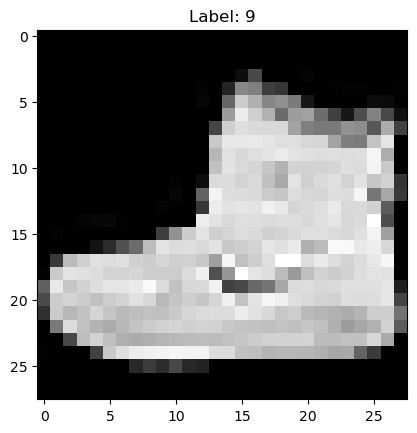

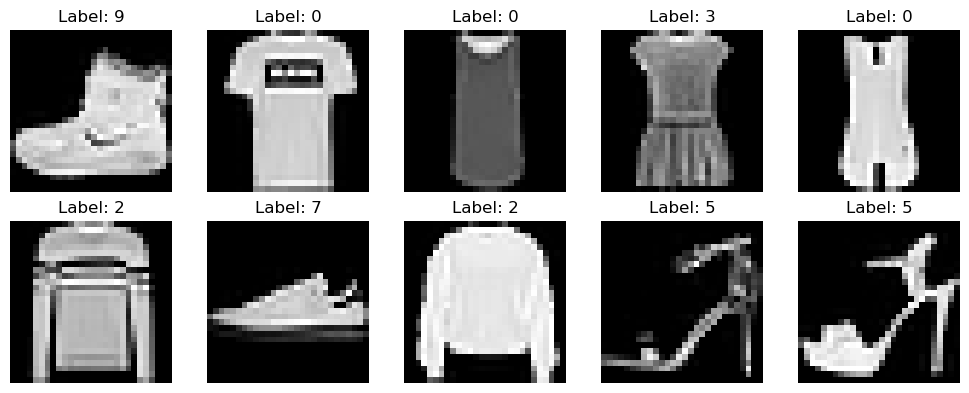

In [4]:
# Display a single image
plt.imshow(X_train[0], cmap='gray')
plt.title('Label: ' + str(y_train[0]))
plt.show()

# Display multiple images in a grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: ' + str(y_train[i]))
    ax.axis('off')
plt.tight_layout()
plt.show()

# CNN

In [5]:
# import necessary layers and models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [6]:
# Define basic CNN model
basic_model = Sequential([
  Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
  MaxPooling2D((2, 2)),  # Max pooling layer
  Flatten(),  # Flatten the output for the dense layer
  Dense(10, activation='softmax')  # Dense layer with 10 outputs (for fashion category label 0-9)
])

basic_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
                    metrics=['accuracy'])

# Define deeper CNN model
deeper_model = Sequential([
  Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D((2, 2)),
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),
  Conv2D(256, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),
  Flatten(),
  Dense(251, activation='relu'),
  Dropout(0.5),  # Dropout layer to prevent overfitting
  Dense(10, activation='softmax')
])

deeper_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

/Users/sohengkhiong/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
basic_history = basic_model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8233 - loss: 0.4972 - val_accuracy: 0.8802 - val_loss: 0.3288
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8997 - loss: 0.2841 - val_accuracy: 0.8970 - val_loss: 0.2978
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9173 - loss: 0.2351 - val_accuracy: 0.9016 - val_loss: 0.2910
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9290 - loss: 0.2007 - val_accuracy: 0.9012 - val_loss: 0.3025
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9404 - loss: 0.1738 - val_accuracy: 0.8999 - val_loss: 0.3155
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9482 - loss: 0.1534 - val_accuracy: 0.8979 - val_loss: 0.3401
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9532 - loss: 0.1367 - val_accuracy: 0.8963 - val_loss: 0.3497
Epoch 8/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9595 - loss: 0

In [8]:
deeper_history = deeper_model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 66s 14ms/step - accuracy: 0.7247 - loss: 0.7548 - val_accuracy: 0.8557 - val_loss: 0.3984
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 61s 13ms/step - accuracy: 0.8593 - loss: 0.3833 - val_accuracy: 0.8700 - val_loss: 0.3592
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 63s 13ms/step - accuracy: 0.8791 - loss: 0.3259 - val_accuracy: 0.8767 - val_loss: 0.3682
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 62s 13ms/step - accuracy: 0.8927 - loss: 0.2958 - val_accuracy: 0.8805 - val_loss: 0.3560
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 59s 12ms/step - accuracy: 0.9005 - loss: 0.2696 - val_accuracy: 0.8786 - val_loss: 0.3933
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 61s 13ms/step - accuracy: 0.9071 - loss: 0.2497 - val_accuracy: 0.8810 - val_loss: 0.3821
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 61s 13ms/step - accuracy: 0.9127 - loss: 0.2357 - val_accuracy: 0.8815 - val_loss: 0.3883
Epoch 8/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 59s 12ms/step - accuracy: 0.9168 -

# Compare both

Basic Model Evaluation:
313/313 - 1s - 2ms/step - accuracy: 0.8826 - loss: 0.4830
Test accuracy: 0.8826000094413757

Deeper Model Evaluation:
313/313 - 2s - 8ms/step - accuracy: 0.8577 - loss: 0.6022
Test accuracy: 0.857699990272522


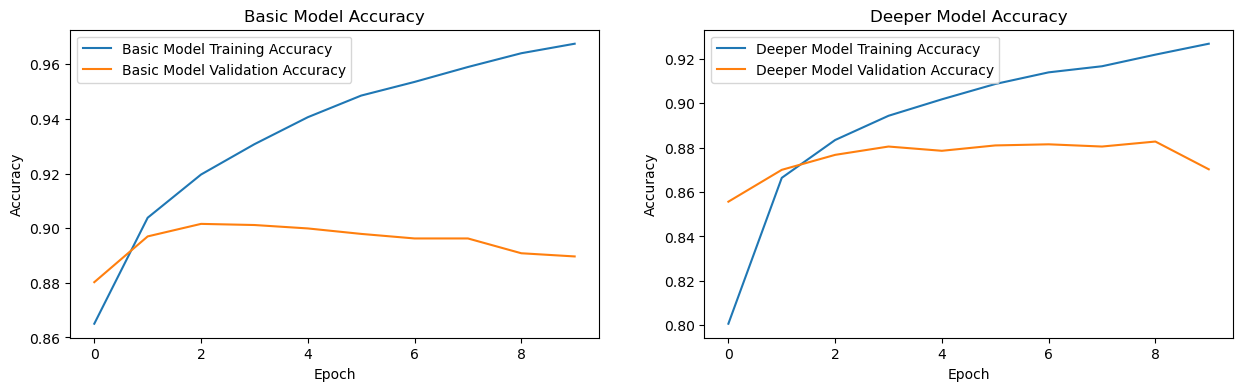

In [9]:
print("Basic Model Evaluation:")
basic_loss, basic_acc = basic_model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {basic_acc}")

print("\nDeeper Model Evaluation:")
deeper_loss, deeper_acc = deeper_model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {deeper_acc}")

# You can also plot training history to compare
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(basic_history.history['accuracy'], label='Basic Model Training Accuracy')
plt.plot(basic_history.history['val_accuracy'], label='Basic Model Validation Accuracy')
plt.title('Basic Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(deeper_history.history['accuracy'], label='Deeper Model Training Accuracy')
plt.plot(deeper_history.history['val_accuracy'], label='Deeper Model Validation Accuracy')
plt.title('Deeper Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

# Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [20]:
basic_pred = basic_model.predict(X_test).argmax(axis=1)
deeper_pred = deeper_model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


Classification Report for Basic Model:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.94      0.65      0.77      1000
           3       0.91      0.89      0.90      1000
           4       0.70      0.93      0.80      1000
           5       0.97      0.98      0.97      1000
           6       0.72      0.67      0.69      1000
           7       0.91      0.98      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.99      0.91      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000


Confusion Matrix Visualization for Basic Model:


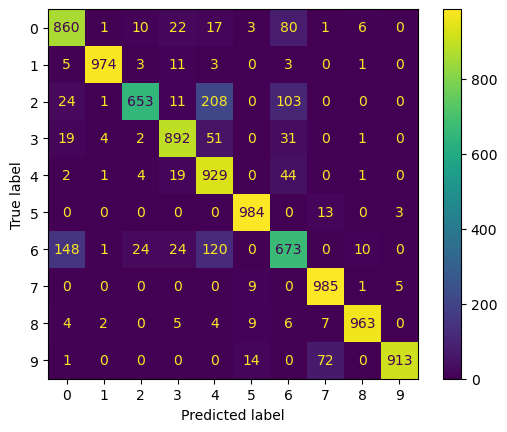

In [21]:
print("Classification Report for Basic Model:")
print(classification_report(y_test, basic_pred))

print("\nConfusion Matrix Visualization for Basic Model:")

cm = confusion_matrix(y_test, basic_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.arange(10))
disp.plot()
plt.show()

Classification Report for Deeper Model:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       1.00      0.95      0.97      1000
           2       0.84      0.78      0.81      1000
           3       0.90      0.90      0.90      1000
           4       0.77      0.84      0.80      1000
           5       0.96      0.98      0.97      1000
           6       0.66      0.66      0.66      1000
           7       0.75      0.99      0.86      1000
           8       0.96      0.97      0.96      1000
           9       1.00      0.68      0.81      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000


Confusion Matrix Visualization for Deeper Model:


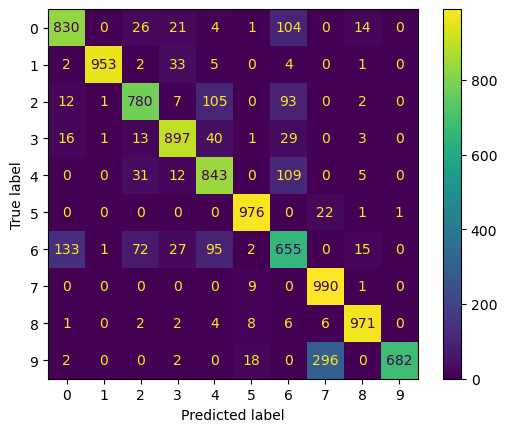

In [31]:
print("Classification Report for Deeper Model:")
print(classification_report(y_test, deeper_pred))

print("\nConfusion Matrix Visualization for Deeper Model:")

cm = confusion_matrix(y_test, deeper_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.arange(10))
disp.plot()
plt.show()

# Using Callback

In [25]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [26]:
# create a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
# create an EarlyStopping callback to stop training when validation accuracy stops improving
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True) 
# Train the deeper model with callbacks
deeper_history_with_callbacks = deeper_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=10,
    validation_split=0.2,
    verbose=1,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 48s 10ms/step - accuracy: 0.9365 - loss: 0.1690 - val_accuracy: 0.8773 - val_loss: 0.4490
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 52s 11ms/step - accuracy: 0.9365 - loss: 0.1701 - val_accuracy: 0.8733 - val_loss: 0.5086
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 63s 13ms/step - accuracy: 0.9397 - loss: 0.1647 - val_accuracy: 0.8803 - val_loss: 0.5870
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 60s 13ms/step - accuracy: 0.9383 - loss: 0.1725 - val_accuracy: 0.8815 - val_loss: 0.5419
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 62s 13ms/step - accuracy: 0.9392 - loss: 0.1661 - val_accuracy: 0.8855 - val_loss: 0.5644
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 62s 13ms/step - accuracy: 0.9420 - loss: 0.1603 - val_accuracy: 0.8834 - val_loss: 0.4942
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 60s 12ms/step - accuracy: 0.9443 - loss: 0.1549 - val_accuracy: 0.8873 - val_loss: 0.5358
Epoch 8/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 60s 13ms/step - accuracy: 0.9425 -

In [27]:
# Load the weights from file
deeper_model.load_weights('best_model.keras')

# Evaluate the model after loading the best weights
deeper_loss, deeper_acc = deeper_model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy after loading best weights: {deeper_acc}")
# Save the final model
deeper_model.save('final_deeper_model.keras')

313/313 - 2s - 8ms/step - accuracy: 0.8817 - loss: 0.6243
Test accuracy after loading best weights: 0.8816999793052673


# regularizer

In [28]:
from tensorflow.keras.regularizers import l2



In [30]:
def create_model_with_regularization(reg_strength=0.0):
    model = Sequential([
        Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(reg_strength)),
        MaxPooling2D((2, 2)),
        Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(reg_strength)),
        MaxPooling2D((2, 2)),
        Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(reg_strength)),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(reg_strength)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train models with different regularization strengths
reg_strengths = [0.0, 0.001, 0.01] # 0.0 is no regularization
histories_reg = {}

for reg_strength in reg_strengths:
    print(f"Training with regularization strength: {reg_strength}")
    model_reg = create_model_with_regularization(reg_strength)
    histories_reg[reg_strength] = model_reg.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2, verbose=1)

# Compare performance
print("\nComparison of models with different regularization strengths:")
for reg_strength, history in histories_reg.items():
    print(f"Reg Strength: {reg_strength} - Val Accuracy: {history.history['val_accuracy'][-1]:.4f}")
# print(f"Base Model - Val Accuracy: {history_base.history['val_accuracy'][-1]:.4f}")

Training with regularization strength: 0.0
Epoch 1/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 234s 49ms/step - accuracy: 0.7801 - loss: 0.5894 - val_accuracy: 0.8720 - val_loss: 0.3523
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 246s 51ms/step - accuracy: 0.8904 - loss: 0.3004 - val_accuracy: 0.8802 - val_loss: 0.3288
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 401s 84ms/step - accuracy: 0.9077 - loss: 0.2506 - val_accuracy: 0.8895 - val_loss: 0.3273
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 401s 83ms/step - accuracy: 0.9218 - loss: 0.2073 - val_accuracy: 0.8873 - val_loss: 0.3662
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 410s 85ms/step - accuracy: 0.9333 - loss: 0.1769 - val_accuracy: 0.8819 - val_loss: 0.4288
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 318s 66ms/step - accuracy: 0.9414 - loss: 0.1612 - val_accuracy: 0.8835 - val_loss: 0.5065
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 238s 50ms/step - accuracy: 0.9485 - loss: 0.1397 - val_accuracy: 0.8910 - val_loss: 0.4470
Epoch 8/10
4800/4800 ━━━━━